In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = False

In [6]:
fidelities = [0.7818469480098537, 0.9917498699885816, 0.9930037233479588, 0.9937626425348742, 0.9950546727346131, 0.9946467797162853, 0.9968427901400029, 0.9968364167215662, 0.9927796315915723, 0.9959092503496494]
traces = [0.3887154315166287, 0.09083142158752783, 0.08364772850488764, 0.07898571672442796, 0.07031347252175554, 0.07316777882205877, 0.05619013662079383, 0.056239960254816, 0.0849747731446145, 0.0639566884601998]

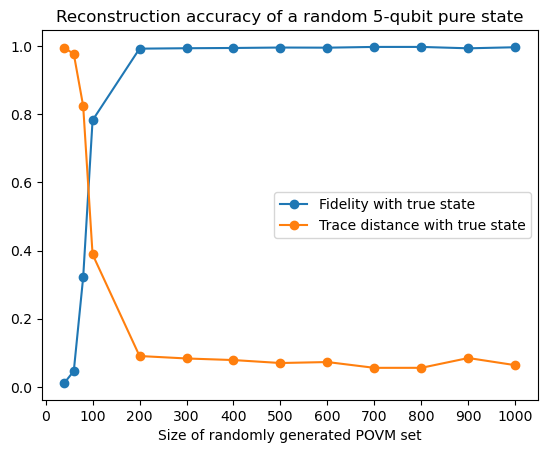

In [8]:
new_traces = [0.9939940970250712, 0.97628853024805, 0.8235752921671977]
new_fidel = [0.011975934214670598,  0.046860798659851155, 0.3217241739385392]
              
x = [40,60,80,100,200,300,400,500,600,700,800,900,1000]
plt.plot(x,new_fidel+fidelities, label='Fidelity with true state', marker='o')
plt.plot(x,new_traces+traces, label='Trace distance with true state', marker='o')
plt.xlabel('Size of randomly generated POVM set')
plt.xticks(range(0,1100,100))
#plt.yticks(np.arange(0,1.1,0.1))
plt.legend()
plt.title('Reconstruction accuracy of a random 5-qubit pure state')
plt.savefig('reconstruction_vs_POVM-size-new.png', dpi=500)

plt.show()


In [ ]:
import concurrent.futures
import subprocess

# Define your commands
commands = []
povms = [40,60,80,100,200,300,400,500,600,700,800,900]
for k in povms:
    command = f'python ./qst.py 5 1 -n "GHZ_5_{k}"'
    commands.append(command)

def run_command(command):
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True, bufsize=1)
    for output_line in iter(process.stdout.readline, ''):
        print(f"[{command}] {output_line.strip()}")
    process.stdout.close()
    return_code = process.wait()
    return command, return_code

# Use ThreadPoolExecutor to run commands in parallel
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Submit commands for execution
    futures = [executor.submit(run_command, cmd) for cmd in commands]

    # Wait for all tasks to complete
    concurrent.futures.wait(futures)

    # Retrieve results
    for future in futures:
        command, return_code = future.result()
        print(f"[{command}] Return Code: {return_code}")


In [41]:
random_trace_dist = [0.7572927911213694, 0.7878410669296911, 0.08460097904142055, 0.9997824716976346, 0.2648731179511059]
random_fidel = [0.426507334178549, 0.3793062365176749, 0.9928430008828657, 0.0004350212944408144, 0.9298425815369129]

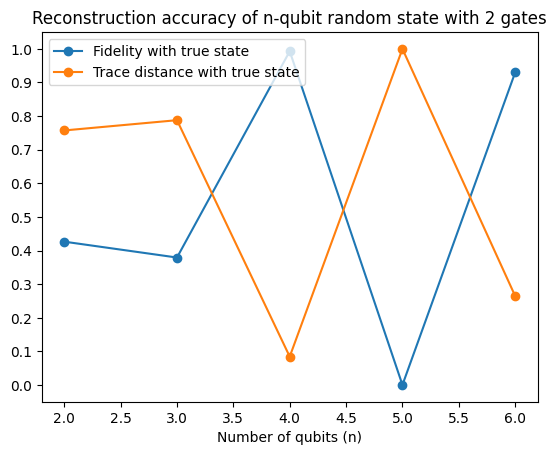

In [42]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = False

x = [2, 3, 4, 5, 6, 7, 8]
plt.plot(x,random_fidel, label='Fidelity with true state', marker='o')
plt.plot(x,random_trace_dist, label='Trace distance with true state', marker='o')
plt.xlabel('Number of qubits (n)')
plt.yticks(np.arange(0,1.1,0.1))
plt.legend()
plt.title('Reconstruction accuracy of n-qubit random state with 2 gates')
plt.savefig('reconstruction_vs_random-2gates.png', dpi=500)

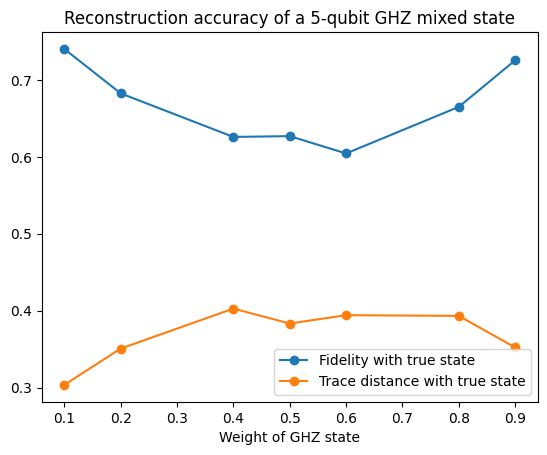

In [16]:
mpl.rcParams['text.usetex'] = False

# 5 qubit mixed GHZ state
traces = [0.3034095340436265, 0.35063905902740966, 0.40265890912664504, 0.383234784164496, 0.3941007922488985, 0.39316464494581327, 0.35213814778474306]
fidel = [0.7402883400007039, 0.6825263270499176, 0.625856453809788, 0.6268953095287195, 0.6043723102157369, 0.6649366653649041, 0.7255084129700935]
x = [0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 0.9]
plt.plot(x,fidel, label='Fidelity with true state', marker='o')
plt.plot(x,traces, label='Trace distance with true state', marker='o')
plt.xlabel('Weight of GHZ state')
#plt.yticks(np.arange(0,1.1,0.1))
plt.legend()
plt.title('Reconstruction accuracy of a 5-qubit GHZ mixed state')
plt.savefig('reconstruction_vs_weights-GHZ_5_mixed.png', dpi=500)

plt.show()

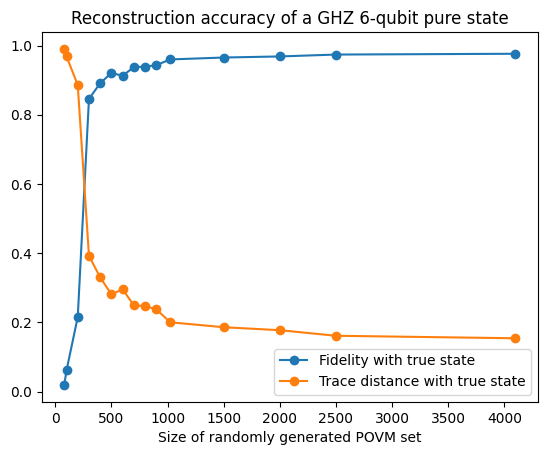

In [15]:
mpl.rcParams['text.usetex'] = False

# 6 qubit GHZ state
traces = [0.9901626852902594,0.96875322465045,0.8857910763642729,0.39260156259164275,0.33001354947729955,0.28114605737800025,0.29581609500536843,0.24914570913177408,0.2474822167382693,0.23781744482886116, 0.2005131760445239, 0.18621953556165413, 0.17766965184950573, 0.16156978807597305, 0.1543355947000537]
fidel = [0.019577986525622416,0.06151714023020684,0.21537411593724473,0.8458643835377887,0.8910915252981555,0.9209568790015246,0.9124929441834536,0.937926975892229,0.9387519929116063,0.9434427864954765, 0.9597944023092947, 0.965322524413772, 0.9684341651237275, 0.9738957749628836, 0.9761808818772061]
x = [80, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1024, 1500, 2000, 2500, 4096]
plt.plot(x,fidel, label='Fidelity with true state', marker='o')
plt.plot(x,traces, label='Trace distance with true state', marker='o')
plt.xlabel('Size of randomly generated POVM set')
#plt.yticks(np.arange(0,1.1,0.1))
plt.legend()
plt.title('Reconstruction accuracy of a GHZ 6-qubit pure state')
plt.savefig('reconstruction_vs_POVM-GHZ_6.png', dpi=500)

plt.show()